In [1]:
%matplotlib inline

In [2]:
from sklearn.externals import joblib
import tensorflow.keras
from tensorflow.keras import models
from tensorflow.keras import layers
import model_evaluation_utils as meu
import matplotlib.pyplot as plt

In [3]:
train_features = joblib.load('train_tl_features.pkl')
train_labels = joblib.load('train_labels.pkl')
validation_features = joblib.load('validate_tl_features.pkl')
validation_labels = joblib.load('validate_labels.pkl')
test_features = joblib.load('test_tl_features.pkl')
test_labels = joblib.load('test_labels.pkl')

train_features.shape, validation_features.shape, test_features.shape

((18300, 2048), (6100, 2048), (6100, 2048))

In [4]:
train_labels.shape, validation_labels.shape, test_labels.shape

((18300,), (6100,), (6100,))

In [6]:
from tensorflow.keras.utils import to_categorical

train_labels_ohe = to_categorical(train_labels)
validation_labels_ohe = to_categorical(validation_labels)
test_labels_ohe = to_categorical(test_labels)

In [7]:
train_labels_ohe.shape, validation_labels_ohe.shape, test_labels_ohe.shape

((18300, 10), (6100, 10), (6100, 10))

In [8]:
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(train_features.shape[1],)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_labels_ohe.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',                 
                      metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)  

In [9]:
history = model.fit(train_features,
                    train_labels_ohe,
                    epochs=50,
                    batch_size=128,
                    validation_data=(validation_features, validation_labels_ohe), 
                    shuffle=True,
                    verbose=1)

Train on 18300 samples, validate on 6100 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
18300/18300 [==============================] - 1s 68us/sample - loss: 1.4205 - acc: 0.4919 - val_loss: 0.9334 - val_acc: 0.7002
Epoch 2/50
18300/18300 [==============================] - 1s 30us/sample - loss: 0.9431 - acc: 0.6843 - val_loss: 0.7346 - val_acc: 0.7659
Epoch 3/50
18300/18300 [==============================] - 1s 30us/sample - loss: 0.7988 - acc: 0.7390 - val_loss: 0.6525 - val_acc: 0.7931
Epoch 4/50
18300/18300 [==============================] - 1s 30us/sample - loss: 0.7199 - acc: 0.7678 - val_loss: 0.5994 - val_acc: 0.8061
Epoch 5/50
18300/18300 [==============================] - 1s 30us/sample - loss: 0.6572 - acc: 0.7879 - val_loss: 0.5725 - val_acc: 0.8185
Epoch 6/50
18300/18300 [==============================] - 1s 30us/sample - loss: 0.6199 - acc: 0.7975 - val_loss: 0.5187 - val_acc: 0.8349
Epoch 7/50
18300/18300 [==============================] - 1s 30us/sam

In [10]:
predictions = model.predict_classes(test_features)

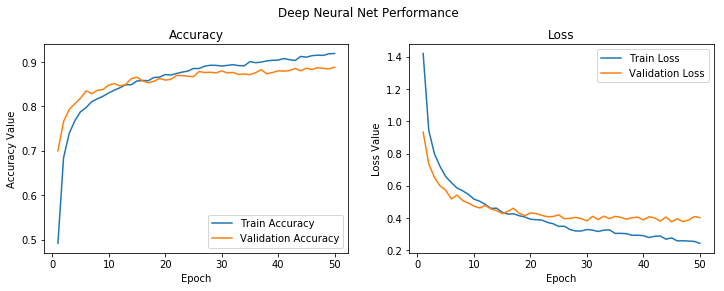

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.2)

epochs = list(range(1,51))
ax1.plot(epochs, history.history['acc'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_acc'], label='Validation Accuracy')
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [12]:
class_map = {'0' : 'air_conditioner', '1' : 'car_horn', '2' : 'children_playing', '3' : 'dog_bark', '4' : 'drilling', 
             '5' : 'engine_idling', '6' : 'gun_shot', '7' : 'jackhammer', '8' : 'siren', '9' : 'street_music'}

test_labels_categories = [class_map[str(label)] for label in test_labels]
prediction_labels_categories = [class_map[str(label)] for label in predictions]
category_names = list(class_map.values())

In [13]:
meu.get_metrics(true_labels=test_labels_categories, 
                predicted_labels=prediction_labels_categories)

Accuracy: 0.8923
Precision: 0.8924
Recall: 0.8923
F1 Score: 0.8918


In [14]:
meu.display_classification_report(true_labels=test_labels_categories, 
                                  predicted_labels=prediction_labels_categories, 
                                  classes=category_names)

                  precision    recall  f1-score   support

 air_conditioner       0.91      0.93      0.92       812
        car_horn       0.89      0.76      0.82       177
children_playing       0.82      0.84      0.83       814
        dog_bark       0.90      0.81      0.85       591
        drilling       0.92      0.90      0.91       677
   engine_idling       0.93      0.93      0.93       732
        gun_shot       0.95      0.88      0.91        67
      jackhammer       0.90      0.95      0.92       704
           siren       0.93      0.97      0.95       730
    street_music       0.84      0.83      0.84       796

       micro avg       0.89      0.89      0.89      6100
       macro avg       0.90      0.88      0.89      6100
    weighted avg       0.89      0.89      0.89      6100



In [17]:
meu.display_confusion_matrix(true_labels=test_labels_categories, 
                                    predicted_labels=prediction_labels_categories, 
                                    classes=category_names)

                              Predicted:                                     \
                         air_conditioner car_horn children_playing dog_bark   
Actual: air_conditioner              755        1               12        3   
        car_horn                       3      134                4        1   
        children_playing              14        0              685       32   
        dog_bark                      10        1               47      481   
        drilling                       6        1                3        2   
        engine_idling                 15        2               10        2   
        gun_shot                       2        0                3        1   
        jackhammer                    10        1                2        0   
        siren                          1        1               10        2   
        street_music                  12        9               62       13   

                                                   

/home/dyanos/projects/transfer_learning/Chapter08/model_evaluation_utils.py:62: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels),
/home/dyanos/projects/transfer_learning/Chapter08/model_evaluation_utils.py:64: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  labels=level_labels))


In [18]:
model.save('sound_classification_model.h5') 